In [93]:
#https://matplotlib.org/stable/tutorials/introductory/images.html
#https://github.com/akmadan/matplotlib_tutorial/blob/main/IMSHOW.ipynb
#https://www.geeksforgeeks.org/working-with-images-in-python-using-matplotlib/

In [150]:
!pip install opencv-python

In [151]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from scipy.signal import find_peaks

import cv2 as cv

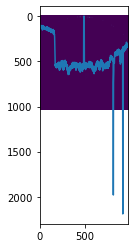

In [118]:
img = Image.open(r"C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_2_1961.7s_RH661.032_x0.300_th0.000_5.00s_458795_waxs.tiff")
#for the image you just insert the file path. On Windows 10 this is found by left clicking once on an image and then going above it and finding where it says "copy path"
#take the path and insert it (with the quotations included) after r into the Image.open(r) function
img1 = img.convert('I') # 'I' : 32-bit integer pixels
img1.show()

data = ( np.copy( np.asarray(img1) ) ).astype(float) #I am unsure what data is actually getting and what the peaks are
plt.imshow(data)
plt.plot(data[0,:])

In [119]:
smallest_num=2.2250738585072014*10**(-306) #2.2250738585072014*10**(-308) is the smallest positive number in python by I will just increase this number by 100 times. 
#I don't want for the logarithm to have issue computing with a number so close to the minnimum.
data_log = np.log10(data+2+smallest_num) #np.min(img)=-2 so the lowest data point in the image (the 2d array representing the image values) is -2. 
#log base 10 has domain: x>0 for x in R so we want to add over 2 in order to plot. 
#I will go as close to 2 as possbile to minnimize the amount the graph is transformed from the orginal 
#(which we had certain values we couldn't plot so the whole thing wouldn't plot).

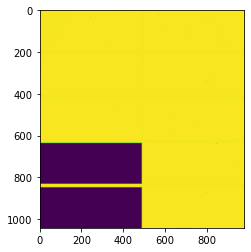

In [120]:
plt.imshow(data_log) #this graph seems to have no use. This being said, I am not sure so this code is being left

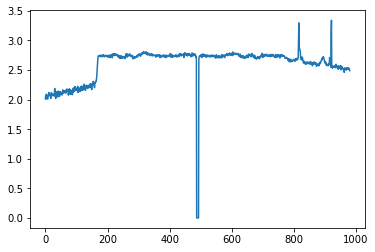

In [121]:
plt.plot(data_log[0,:])

In [122]:
#I need to find how to find peaks, but matplotlib can't find them with some function for some reason.

In [123]:
np.linspace(0, 1043, 1043)

array([0.00000000e+00, 1.00095969e+00, 2.00191939e+00, ...,
       1.04099808e+03, 1.04199904e+03, 1.04300000e+03])

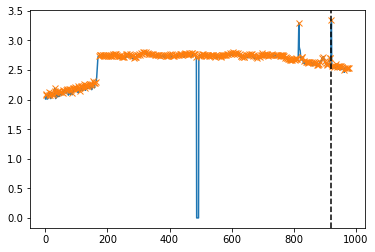

max peak at[921.9397959183673,3.341038631677523]


In [124]:
x = np.linspace(0, 981,981)  # equal spacing needed for find_peaks. We need 981 so x has the same first dimension as y. y has 981.
y = data_log[0,:]
# Find peaks
i_peaks, _ = find_peaks(y, height=0)

# Find the index from the maximum peak
i_max_peak = i_peaks[np.argmax(y[i_peaks])]

# Find the x value from that index
x_max = x[i_max_peak]

# Plot the figure
plt.plot(x, y)
plt.plot(x[i_peaks], y[i_peaks], 'x')
plt.axvline(x=x_max, ls='--', color="k")
plt.show()
print("max peak at"+"["+str(x[i_max_peak])+","+str(y[i_max_peak])+"]")



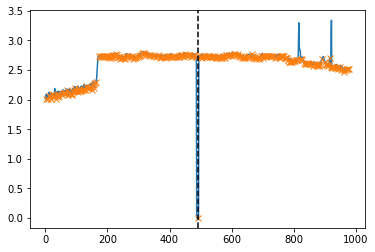

max peak at[490.49999999999994,0.0]


In [125]:
x = np.linspace(0, 981,981)  # equal spacing needed for find_peaks. We need 981 so x has the same first dimension as y. y has 981.
y = data_log[0,:]
# Find peaks
i_peaks, _ = find_peaks(-y) #the negative finds the opposite of the max- so the min

# Find the index from the minimum peak
i_min_peak = i_peaks[np.argmin(y[i_peaks])]

# Find the x value from that index
x_min = x[i_min_peak]

# Plot the figure
plt.plot(x, y)
plt.plot(x[i_peaks], y[i_peaks], 'x')
plt.axvline(x=x_min, ls='--', color="k")
plt.show()
print("max peak at"+"["+str(x[i_min_peak])+","+str(y[i_min_peak])+"]")
#min doesn't work

In [126]:
print(np.argmin(np_data_log))
print(np.argmax(np_data_log))

20189
26056


In [127]:
#Basic image plotting and colormapping

In [128]:
img2 = np.asarray(Image.open("/Users/Bradley/Videos/New folder/AgBH_cali_5m_13.5kev_2_1961.7s_RH661.032_x0.300_th0.000_5.00s_458795_waxs.tiff"))
# for numpy version of file all backslashes turned in forward slashes. Also no "r" and C: as shown in cell 1.


In [129]:
print(repr(img2)) #Each inner list represents a pixel. Here, with an RGB image, there are 3 values.
#repr() just gives a printable version of the object (the img2 array in this case)
print()
print("array size: "+str(len(img2))) #amount of arrays in the 2D array- which should tell us the pixel amount

array([[102, 116, 100, ..., 322, 314, 306],
       [106, 104, 120, ..., 343, 331, 307],
       [ 95, 124, 107, ..., 383, 334, 281],
       ...,
       [ -2,  -2,  -2, ..., 153, 188, 176],
       [ -2,  -2,  -2, ..., 160, 159, 161],
       [ -2,  -2,  -2, ..., 182, 147, 155]])

array size: 1043


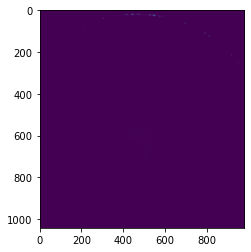

In [130]:
#"Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor".
plt.imshow(img2)
#this is called viridis. It is the basic color map. lum_img2 = img[:, :,] is how it is defined and
#plt.imshow(lum_img2, cmap="viridis") is its code

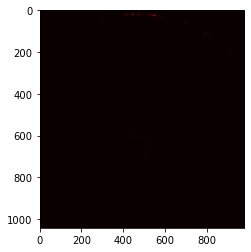

In [131]:
plt.imshow(img2, cmap="hot")

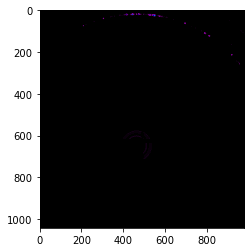

In [132]:
plt.imshow(img2, cmap="nipy_spectral") #this map seems useful as it is the most clear

In [133]:
#I tried every single pre-defined color map: https://matplotlib.org/stable/tutorials/colors/colormaps.html 
#Note I didn't try to create my own maps with the array notation.
#To get a new color from the website, paste defined name between the quotation marks


#I am going to make a short tier list of colormaps (maps are unranked within each tier) :)

# Tier 1) You can see the circle so top tier (many of these are under the miscellaneous colormaps)
#"flag", "gist_earth", "gist_stern", "gnuplot", "jet", "turbo", "nipy_spectral", "gist_ncar"

# Tier 2) Many visible points
#"pink", "hsv", "tab20", "prism", "terrain"

#Tier 3) Points are mostly visible but less than Tier 2
#"PiYG", "PRGn", "BrBG", "PuOr", "RdGy", "RdBu", "RdYlBu","RdYlGn", "Spectral", "coolwarm"



#The best two are "flag", "gist_stern". I will use "gist_stern" in the future since the map colors don't vary much, compared to flag.


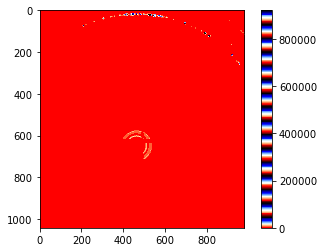

In [134]:
plt.imshow(img2, cmap="flag")
plt.colorbar() #the colorbar on the side has little meaning since the colors aren't dependent on scalar values of the image brightness. As shown on the bar, the same colors are repeated many times, so you can't tell their strength

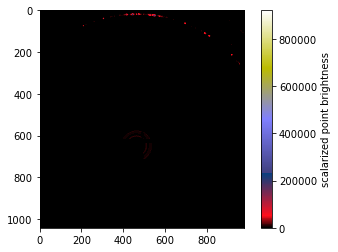

In [135]:
plt.imshow(img2, cmap="gist_stern")
plt.colorbar(label="scalarized point brightness") #tells you the "strength" of the image at this point 

In [136]:
#we want to analyze a specific region of our plot.
#We want to enhance the contrast in the image, or expand the contrast in a particular region 
#while sacrificing the detail in colors that don't vary much, or don't matter.

(array([  1.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   2.,   3.,   1.,
          2.,   8.,   9.,   8.,   8.,   8.,   8.,  18.,  22.,  25.,  17.,
         14.,  28.,  40.,  37.,  42.,  41.,  46.,  46.,  73.,  68.,  79.,
         83.,  81., 106.,  93., 119., 118., 143., 133., 130., 159., 158.,
        175., 184., 194., 220., 182., 203., 213., 213., 218., 221., 212.,
        252., 218., 266., 221., 227., 

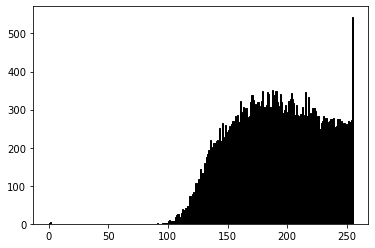

In [137]:
plt.hist(img2.ravel(), bins=range(256), fc='k', ec='k')
#if you make the bins=range(500) then which value is maximum on the histogram changes?
#Also, a bin is just a way of dividing up histogram data

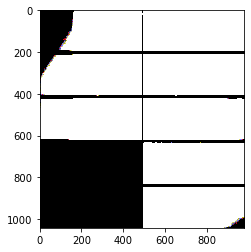

In [138]:
#We want to zoom in on a specific peak
#Clim is the colormap limits you want to analyze in between.
plt.imshow(img2,cmap="gist_stern",clim=(240,256))


In [139]:
#Image interpolation scheme (we lose information since the pixel number needed changes when resizing images, 
#but we want the same information)


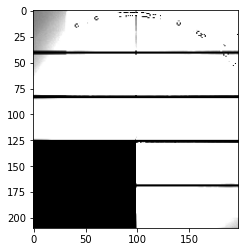

In [140]:
img = Image.open("/Users/Bradley/Videos/New folder/AgBH_cali_5m_13.5kev_2_1961.7s_RH661.032_x0.300_th0.000_5.00s_458795_waxs.tiff")
img.thumbnail((210, 210))  # resizes image in-place. I manually found 210 to be best.
imgplot = plt.imshow(img)

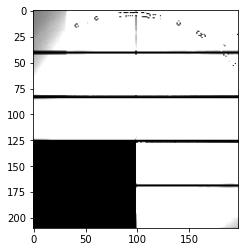

In [141]:
imgplot = plt.imshow(img, interpolation="bilinear")

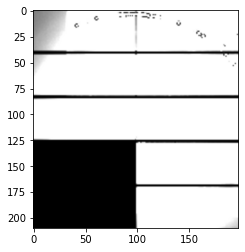

In [142]:
imgplot = plt.imshow(img, interpolation="bicubic")

In [143]:
#line cut of the image- vertically and horizontally

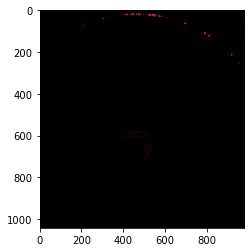

In [147]:
col_map=plt.imshow(img2, cmap="gist_stern")
col_map

In [161]:
# Load an image
cvimg = cv.imread("/Users/Bradley/Videos/New folder/AgBH_cali_5m_13.5kev_2_1961.7s_RH661.032_x0.300_th0.000_5.00s_458795_waxs.tiff")

# Get the pixel at (x, y)
pixel = cvimg[5, 5]

# Get the RGB values of the pixel
r, g, b = pixel

# Print the RGB values
print(r, g, b)

TypeError: 'NoneType' object is not subscriptable